In [2]:
import nibabel as nib

In [10]:
big_img = nib.load("./functional_channel_2.nii")

In [12]:
big_img.shape

(256, 128, 49, 3384)

In [13]:
data = big_img.get_fdata()

In [115]:
new_data_slice = data[:, :, 26, :].copy()

In [94]:
from scipy.ndimage import convolve1d

In [100]:
new_data_slice = convolve1d(
    new_data_slice, 
    weights=np.ones(100) / 100, axis=2, mode="constant")
new_data_slice.shape

(256, 128, 3384)

In [103]:
import numpy 
img = nib.Nifti1Image(new_data_slice, np.eye(4), )

img.set_data_dtype(big_img.get_data_dtype())

nib.save(img, 'test-frame28-channel2.nii')

In [32]:
new_data_slice.max()

8191.0

In [33]:
big_img.get_data_dtype()

dtype('<u2')

In [38]:
data.dtype

dtype('float64')

In [328]:
img = np.mean(new_data_slice, axis=2)

In [444]:
data = new_data_slice.copy()

In [445]:
data = data - 80 
data[data < 0] = 0

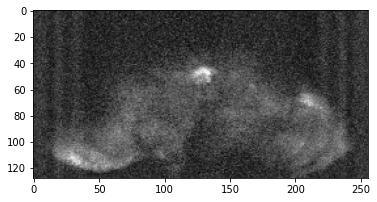

In [449]:
plt.imshow(data.mean(axis=2).T,  cmap='Greys_r',  )

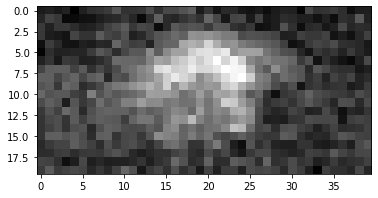

In [452]:
plt.imshow(data[110:150, 40:60, :].mean(axis=2).T,  cmap='Greys_r',  )

In [465]:
segment_2 = data[70:110, 60:80, :3000]
segment_2_flat = ((segment_2.sum(axis=0).sum(axis=0) / (40 * 20)))
# plt.plot(segment_2_flat)
normal_segment_2 = (segment_2_flat - segment_2_flat.mean())/segment_2_flat.std()

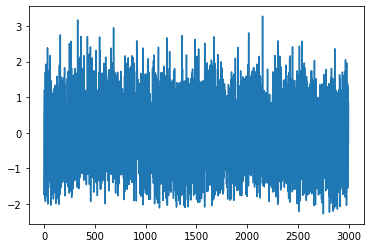

In [467]:
plt.plot(normal_segment_2)

In [470]:
segment_1 = data[110:150, 40:60, :3000]
segment_1_flat = ((segment_1.sum(axis=0).sum(axis=0) / (40 * 20)))
# plt.plot(segment_2_flat)
normal_segment_1 = (segment_1_flat - segment_1_flat.mean())/segment_1_flat.std()

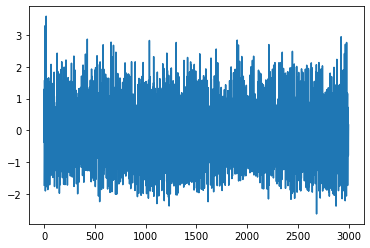

In [471]:
plt.plot(normal_segment_1)

In [439]:
data = data.reshape((256, 128, 282, 12))

In [440]:
result = data.mean(axis=2)

In [441]:
result.shape

(256, 128, 12)

In [442]:
img = nib.Nifti1Image(result, np.eye(4), )

img.set_data_dtype(big_img.get_data_dtype())

nib.save(img, 'test-frame28-channel2.nii')

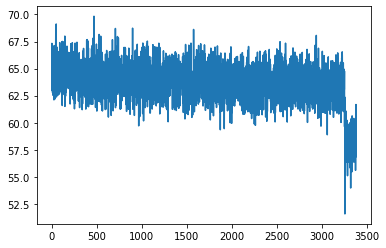

In [425]:
orig_data = new_data_slice.copy()
plt.plot(orig_data.sum(axis=0).sum(axis=0) / (256 * 128))

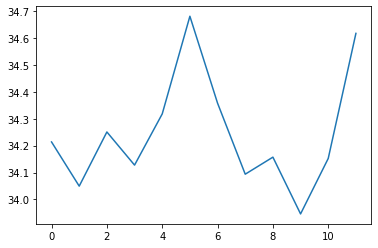

In [443]:
plt.plot(result.sum(axis=0).sum(axis=0) / (256 * 128))

In [404]:

for periodicity in [24]:
    means = []
    for i in range(12):
        freq_series = time_series[i:3000:periodicity]
    #     plt.plot(freq_series, label=i)
        mean_ = freq_series.mean()
        means += [mean_]
        min_ = freq_series.min()
        max_ = freq_series.max()
#     print(f"Stats for {i}: mean={mean_:0.2f} min={min_:0.2f} max={max_:0.2f}")
# plt.legend()
    print(f"PERIOD {periodicity} - Deviation of means", np.std(means))
#     

PERIOD 24 - Deviation of means 0.2702187022361271


In [330]:
import matplotlib.pyplot as plt

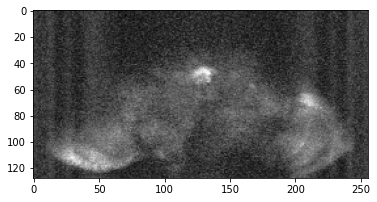

In [331]:
plt.imshow(img.T,  cmap='Greys_r',  )

In [339]:
img2 = img.copy()
img2[img2 < 70] = 0

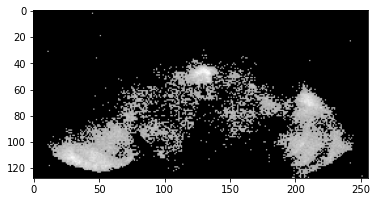

In [340]:
plt.imshow(img2.T,  cmap='Greys_r',  )

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

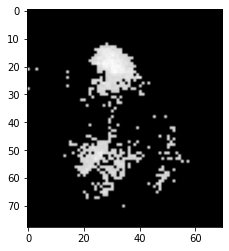

In [336]:
# original_stimulus = new_data_slice[180:250, 50:, :]
original_stimulus = stimulus = new_data_slice[180:250, 50:, :].copy()
# stimulus = stimulus - 350
# stimulus[stimulus < 80] = 0
stimulus = np.mean(stimulus, axis=2)
stimulus[stimulus < 80] = 0
plt.imshow(stimulus.T, cmap='Greys_r',  )
stimulus

In [281]:
original_stimulus[stimulus < 80] = 0

In [292]:
original_stimulus.shape

(70, 78, 3384)

In [293]:
img = nib.Nifti1Image(original_stimulus, np.eye(4), )

img.set_data_dtype(big_img.get_data_dtype())

nib.save(img, 'test-frame28-channel2.nii')

In [285]:
original_stimulus.shape

(70, 78, 3384)

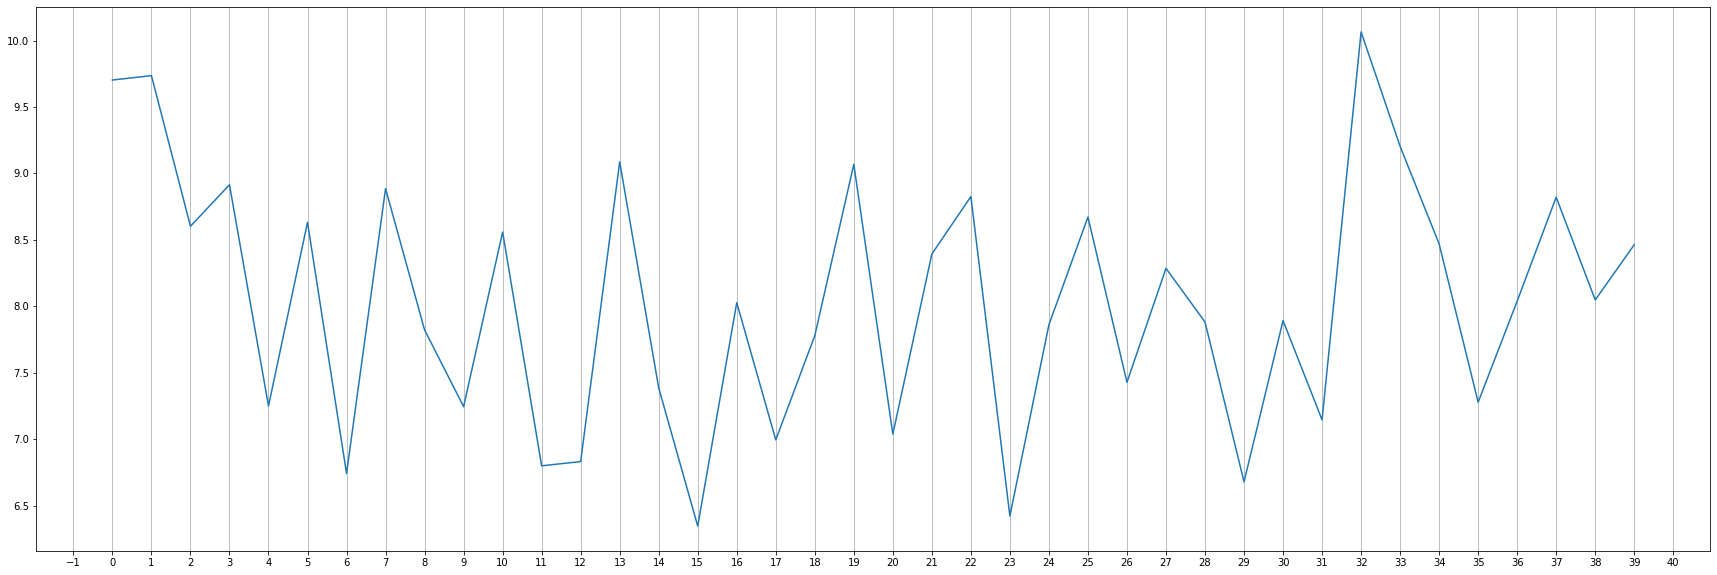

In [288]:
import matplotlib.ticker as mticker
import seaborn as sbn

plt.figure(figsize=(30,10))
plt.plot(original_stimulus[:, :, 400:440].sum(axis=0).sum(axis=0) / (70*78))
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.gca().xaxis.grid(b=True, which='major')
plt.gca().xaxis.grid(b=True, which='minor')


In [120]:
stimulus.shape

(100, 28, 3384)